In [44]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split 
from sklearn import metrics

from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [45]:
df = pd.read_csv('../data/combined_cleaned_vectorized.csv')

In [46]:
df

,Unnamed: 0,id,title,text,score,label
0,0,1409xqw,Mania Coping Skills,"['many', 'people', 'experience', 'increased', ...",51,0
1,2,149pkfl,What are your telltale signs you’re going into...,"['noticed', 'today', 'kept', 'randomly', 'laug...",23,0
2,3,149odnt,How do you cope when you go from manic to depr...,"['manic', 'two', 'week', 'yesterday', 'fell', ...",15,0
3,4,1497cwy,Quit my job last week during an episode. Regre...,"['school', 'teacher', 'love', 'class', 'couple...",137,0
4,5,149a229,Relationships?,"['anyone', 'feel', 'like', 'lone', 'forever', ...",63,0
...,...,...,...,...,...,...
3509,3961,9clec2,I think this should be a safe space again.,"['used', 'love', 'browsing', 'subreddit', 'par...",183,1
3510,3966,v6fevb,I did it!,"['struggled', 'lot', 'weight', 'year', 'especi...",184,1
3511,3992,12oays0,the amount of this stuff I see is annoying.,"['make', 'anyone', 'else', 'uncomfortable']",178,1
3512,4000,jcsgwz,Schizophrenia_specia is a scam,"['need', 'mod', 'see', 'person', 'called', 'sc...",180,1


In [51]:
# Check null values in the "text" column
text_null_count = df['text'].isnull().sum()
print("Number of null values in 'text' column:", text_null_count)

# Check null values in the "title" column
title_null_count = df['title'].isnull().sum()
print("Number of null values in 'title' column:", title_null_count)

Number of null values in 'text' column: 0
Number of null values in 'title' column: 0


In [47]:
X = df['text']
y = df['label']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Define the words to exclude
custom_stop_words = [ 'i', 'people', 'know', 'feel', 'im', 'get', 'like', 'thing', 'similar', 'really', 'want', 'get', 
'also', 'new', 'think', 'year', 'dupe', 'one', 'help', 'time', 'dont', 'think', 'want', 'much', 'one', 'really', 'would', 'help', 'thought', 'year','day', 
'life', 'could', 'even', 'also', 'ive', 'go', 'make', 'something', 'way', 'see', 'going', 'say', 'anyone', 'could', 'take', 'got', 'much', 'someone', 'still', 
 'back', 'friend', 'lot', 'cant', 'med', 'started', 'need', 'month', 'since', 'never', 'good', 'even', 'anything', 'first', 'said', 'sometimes', 
'always', 'medication', 'bad', 'around', 'feeling', 'well', 'tell', 'work', 'diagnosed', 'diagnosis','today', 'everything', 'better', 'told', 'trying', 'guy', 'right', 
'person', 'else', 'ever', 'last', 'come', 'night', 'ago', 'doctor', 'made', 'sure', 'week', 'talking', 'everyone', 'away', 'getting', 'long', 'stop', 'keep', 
'taking','try', 'though', 'every', 'please', 'didnt', 'went', 'find', 'thinking', 'question', 'u','actually','thats','recently','may','two','maybe','some']

# Combine the custom stop words with the built-in English stop words
stop_words_list = list(ENGLISH_STOP_WORDS) + custom_stop_words

In [55]:
import xgboost as xgb

# Create a pipeline with TF-IDF vectorizer and XGBoost classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('xgb', xgb.XGBClassifier(random_state=0))
])

# Define the parameter grid for grid search
param_grid = {
    'tfidf__max_features': [500, 1000],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__smooth_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'xgb__n_estimators': [50, 100],
    'xgb__eta': [0.1, 0.3],
    'xgb__subsample': [0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__max_depth': [3, 5, 7]
}

# Perform grid search within the pipeline
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

KeyboardInterrupt: 

Feature: 0, Importance Score: 0.00000
Feature: 1, Importance Score: 0.00000
Feature: 2, Importance Score: 0.00000
Feature: 3, Importance Score: 0.00000
Feature: 4, Importance Score: 0.00000
Feature: 5, Importance Score: 0.00000
Feature: 6, Importance Score: 0.00000
Feature: 7, Importance Score: 0.00000
Feature: 8, Importance Score: 0.00000
Feature: 9, Importance Score: 0.00000
Feature: 10, Importance Score: 0.00000
Feature: 11, Importance Score: 0.00000
Feature: 12, Importance Score: 0.00000
Feature: 13, Importance Score: 0.00000
Feature: 14, Importance Score: 0.00000
Feature: 15, Importance Score: 0.00000
Feature: 16, Importance Score: 0.00000
Feature: 17, Importance Score: 0.00000
Feature: 18, Importance Score: 0.00000
Feature: 19, Importance Score: 0.00000
Feature: 20, Importance Score: 0.00000
Feature: 21, Importance Score: 0.00000
Feature: 22, Importance Score: 0.00005
Feature: 23, Importance Score: 0.00000
Feature: 24, Importance Score: 0.00000
Feature: 25, Importance Score: 0.00

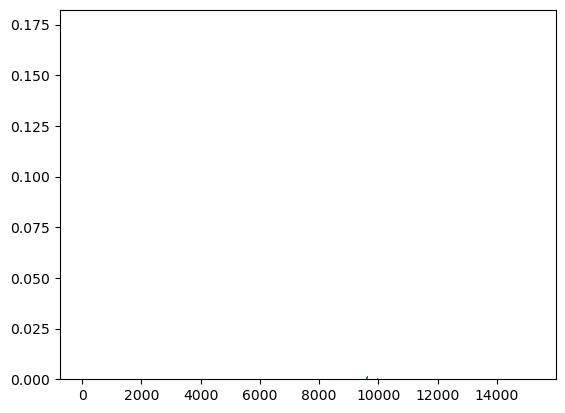

In [30]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Importance Score: %.5f' % (i, v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()